In [1]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import dataPreparation
files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       


prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    priceData = get_price_data(param)
    stock = StockDataFrame.retype(priceData)
    price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    stock.get(string)
    price = stock
    print(price)
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #

    prices.append(price)


/home/andrea/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                         open      high       low     close   volume  \
2017-08-14 21:45:00  159.4792  159.6300  158.7700  159.0900  1400128   
2017-08-14 22:00:00  159.1000  159.3800  158.9000  159.2650  1009525   
2017-08-14 22:15:00  159.2700  159.7300  159.2050  159.2200  1104813   
2017-08-14 22:30:00  159.2152  159.4353  159.2150  159.2600   546638   
2017-08-14 22:45:00  159.2600  159.5300  159.2600  159.4350   556516   
2017-08-14 23:00:00  159.4400  159.6000  159.3200  159.5040   562634   
2017-08-14 23:15:00  159.5000  159.5067  159.2100  159.3000   478202   
2017-08-14 23:30:00  159.2950  159.5000  159.1500  159.4646   537703   
2017-08-14 23:45:00  159.4800  159.5000  159.2500  159.2700   338905   
2017-08-15 00:00:00  159.2700  159.3800  159.2000  159.3200   372649   
2017-08-15 00:15:00  159.3200  159.4200  159.1300  159.1400   353429   
2017-08-15 00:30:00  159.1499  159.3100  159.0800  159.1576   278415   
2017-08-15 00:45:00  159.1600  159.2500  159.0500  159.2000   31

                          open       high        low      close  volume  \
2017-08-14 21:45:00   978.5300   981.9200   977.6600   977.6900  165739   
2017-08-14 22:00:00   977.9500   980.0000   976.1900   978.9990  153670   
2017-08-14 22:15:00   978.8280   980.5000   978.7052   979.9000   90104   
2017-08-14 22:30:00   979.9999   984.4900   979.9999   983.6200  151838   
2017-08-14 22:45:00   983.5491   984.3690   983.0000   983.6700   91582   
2017-08-14 23:00:00   983.8100   985.5000   983.5100   983.9400   94056   
2017-08-14 23:15:00   983.7439   984.2000   983.0901   983.9850   30618   
2017-08-14 23:30:00   984.3800   984.3800   981.6800   982.7900   84051   
2017-08-14 23:45:00   982.9700   983.7400   981.7800   981.8700   45156   
2017-08-15 00:00:00   982.0800   982.3900   980.6300   981.7600   55806   
2017-08-15 00:15:00   981.7200   983.0000   981.4200   982.4400   61109   
2017-08-15 00:30:00   982.8100   982.8600   981.3900   981.7600   54881   
2017-08-15 00:45:00   981

                         open      high       low     close   volume  \
2017-12-20 22:30:00  118.6600  118.7100  118.6600  118.7000    43248   
2017-12-20 22:45:00  118.9500  119.1200  117.5600  117.8200    69261   
2017-12-20 23:00:00  117.8200  118.3200  117.7700  118.2300   163492   
2017-12-20 23:15:00  118.2200  118.4200  118.0900  118.1800    49993   
2017-12-20 23:30:00  118.1800  118.2452  118.0600  118.2400    40796   
2017-12-20 23:45:00  118.2400  118.2500  118.0000  118.1000    43877   
2017-12-21 00:00:00  118.1300  118.2400  118.0500  118.1200    41672   
2017-12-21 00:15:00  118.1101  118.2100  118.0600  118.0600    32619   
2017-12-21 00:30:00  118.0874  118.1400  117.9200  118.0899    28223   
2017-12-21 00:45:00  118.0900  118.0900  117.9300  118.0500    31569   
2017-12-21 01:00:00  118.0500  118.1700  117.9900  118.0050    28177   
2017-12-21 01:15:00  118.0108  118.0900  117.9000  118.0000    87431   
2017-12-21 01:30:00  117.9850  118.1000  117.9850  118.0200    4

                          open       high        low      close  volume  \
2017-08-14 21:45:00   940.1200   941.0400   936.8300   937.5400   58321   
2017-08-14 22:00:00   937.5400   937.9700   934.4850   936.5900   54367   
2017-08-14 22:15:00   936.9849   939.0600   936.8000   937.5300   37324   
2017-08-14 22:30:00   937.8700   938.9900   937.7100   938.2600   18197   
2017-08-14 22:45:00   938.4700   939.0320   938.2500   939.0320   18797   
2017-08-14 23:00:00   939.1026   940.6400   938.6600   938.9400   23105   
2017-08-14 23:15:00   938.7200   939.1804   937.2528   937.5100   22796   
2017-08-14 23:30:00   937.4700   938.4800   936.3500   938.0600   17757   
2017-08-14 23:45:00   938.1600   939.4000   938.0300   938.0300   20762   
2017-08-15 00:00:00   938.5400   939.4800   938.4037   939.3700   15615   
2017-08-15 00:15:00   939.1890   939.9500   939.0900   939.2050   15381   
2017-08-15 00:30:00   939.2500   939.8000   938.6945   938.6945   13825   
2017-08-15 00:45:00   938

                         open      high       low     close   volume  \
2017-08-14 21:45:00   73.2400   73.5400   73.1300   73.4100  1251715   
2017-08-14 22:00:00   73.4200   73.4600   73.2307   73.3200   706012   
2017-08-14 22:15:00   73.3250   73.5400   73.3201   73.3700   805056   
2017-08-14 22:30:00   73.3700   73.4800   73.3650   73.4443   449097   
2017-08-14 22:45:00   73.4400   73.6400   73.4100   73.6290   621930   
2017-08-14 23:00:00   73.6300   73.6700   73.5300   73.5301   499810   
2017-08-14 23:15:00   73.5300   73.6100   73.5200   73.6037   367909   
2017-08-14 23:30:00   73.6050   73.6100   73.4900   73.5613   416377   
2017-08-14 23:45:00   73.5650   73.6000   73.5200   73.5300   404542   
2017-08-15 00:00:00   73.5400   73.5700   73.4700   73.5000   375838   
2017-08-15 00:15:00   73.5000   73.5800   73.4800   73.5600   316364   
2017-08-15 00:30:00   73.5600   73.6000   73.5200   73.5300   274514   
2017-08-15 00:45:00   73.5350   73.5500   73.4900   73.5400   26

                         open      high       low     close   volume  \
2017-08-14 21:45:00  169.7600  169.9800  169.5500  169.6600   546188   
2017-08-14 22:00:00  169.6798  169.9500  169.2900  169.8800   651483   
2017-08-14 22:15:00  169.8850  170.4900  169.8850  170.2600   870655   
2017-08-14 22:30:00  170.2600  170.9700  170.2600  170.5900   774877   
2017-08-14 22:45:00  170.5900  170.8852  170.5000  170.7200   462831   
2017-08-14 23:00:00  170.7250  170.9600  170.5900  170.6200   475164   
2017-08-14 23:15:00  170.6300  170.8000  170.5100  170.7900   267672   
2017-08-14 23:30:00  170.7800  170.7881  170.3400  170.6100   299146   
2017-08-14 23:45:00  170.6200  170.7400  170.2700  170.3100   279571   
2017-08-15 00:00:00  170.2700  170.4600  170.2300  170.3600   323025   
2017-08-15 00:15:00  170.3666  170.5099  170.2900  170.3400   250392   
2017-08-15 00:30:00  170.3400  170.6000  170.3300  170.4780   189451   
2017-08-15 00:45:00  170.4900  170.5600  170.2400  170.5500   21

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  36.1150  36.2200  36.0900  36.2000   388611     36.20000   
2017-08-14 22:00:00  36.2000  36.2600  36.1750  36.1850   661223     36.19250   
2017-08-14 22:15:00  36.1850  36.2800  36.1500  36.2650   571555     36.22500   
2017-08-14 22:30:00  36.2650  36.3400  36.2500  36.2993   544363     36.28215   
2017-08-14 22:45:00  36.2913  36.3200  36.2550  36.3100   334575     36.30465   
2017-08-14 23:00:00  36.3050  36.3250  36.2200  36.2250   594007     36.26750   
2017-08-14 23:15:00  36.2250  36.2250  36.1400  36.1600   882204     36.19250   
2017-08-14 23:30:00  36.1600  36.2400  36.1300  36.2250   504769     36.19250   
2017-08-14 23:45:00  36.2300  36.3100  36.2300  36.3050   280559     36.26500   
2017-08-15 00:00:00  36.3050  36.3600  36.3000  36.3550   405562     36.33000   
2017-08-15 00:15:00  36.3600  36.4300  36.3500  36.4050   742210     36.38000   
2017-08-15 00:30:00  36.4050

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  31.6900  31.7700  31.6700  31.7650   586194     31.76500   
2017-08-14 22:00:00  31.7700  31.8300  31.7400  31.7700  1059200     31.76750   
2017-08-14 22:15:00  31.7700  31.8300  31.7500  31.8000   731919     31.78500   
2017-08-14 22:30:00  31.8000  31.8700  31.8000  31.8700   535278     31.83500   
2017-08-14 22:45:00  31.8700  31.8900  31.8100  31.8408  1123609     31.85540   
2017-08-14 23:00:00  31.8500  31.8800  31.8430  31.8500   332124     31.84540   
2017-08-14 23:15:00  31.8500  31.8800  31.8300  31.8700   423440     31.86000   
2017-08-14 23:30:00  31.8650  31.8700  31.8100  31.8550   596005     31.86250   
2017-08-14 23:45:00  31.8550  31.8600  31.7800  31.7910   498125     31.82300   
2017-08-15 00:00:00  31.7950  31.8100  31.7600  31.7650   505012     31.77800   
2017-08-15 00:15:00  31.7650  31.8100  31.7600  31.7950   696789     31.78000   
2017-08-15 00:30:00  31.7900

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  41.5300  41.6700  41.4950  41.6700   410176     41.67000   
2017-08-14 22:00:00  41.6700  41.7100  41.6000  41.6750   507186     41.67250   
2017-08-14 22:15:00  41.6800  41.7950  41.6100  41.6600   564393     41.66750   
2017-08-14 22:30:00  41.6600  41.7563  41.6500  41.7450   338237     41.70250   
2017-08-14 22:45:00  41.7500  41.8350  41.7450  41.8200   372063     41.78250   
2017-08-14 23:00:00  41.8300  41.9100  41.8000  41.8300   345577     41.82500   
2017-08-14 23:15:00  41.8350  41.8500  41.6800  41.6800   616747     41.75500   
2017-08-14 23:30:00  41.6800  41.6950  41.5700  41.6100   337072     41.64500   
2017-08-14 23:45:00  41.6100  41.6400  41.5600  41.5850   336676     41.59750   
2017-08-15 00:00:00  41.5850  41.6500  41.5500  41.6300   423217     41.60750   
2017-08-15 00:15:00  41.6390  41.7550  41.6200  41.7500   327471     41.69000   
2017-08-15 00:30:00  41.7450

                         open      high       low     close   volume  \
2017-08-14 21:45:00  160.4700  161.7400  160.2700  160.8900  1675393   
2017-08-14 22:00:00  160.9000  162.0700  160.6000  161.2400  1909191   
2017-08-14 22:15:00  161.2400  162.4500  161.0300  161.9310  1479158   
2017-08-14 22:30:00  161.9600  162.6900  161.7710  162.1478  1187131   
2017-08-14 22:45:00  162.1600  162.4700  161.7500  161.8800   781932   
2017-08-14 23:00:00  161.8900  162.4900  161.7000  161.8720   997672   
2017-08-14 23:15:00  161.8900  163.3600  161.8900  163.3236  1052889   
2017-08-14 23:30:00  163.3133  164.0900  162.9500  164.0768  1176159   
2017-08-14 23:45:00  164.0600  164.3500  163.7600  163.8650   882143   
2017-08-15 00:00:00  163.8400  164.7000  163.6800  164.4015   964533   
2017-08-15 00:15:00  164.4051  165.2200  164.0600  165.0000  1289616   
2017-08-15 00:30:00  164.9600  165.5000  164.7100  165.1477  1000995   
2017-08-15 00:45:00  165.1548  165.8100  165.0410  165.2810   95

                         open      high       low     close   volume  \
2017-08-14 21:45:00  170.7255  171.2900  169.7200  170.2400   397982   
2017-08-14 22:00:00  170.1500  170.3200  169.1600  169.5731   401288   
2017-08-14 22:15:00  169.6200  169.7600  168.8000  169.0150   475729   
2017-08-14 22:30:00  169.0000  170.5000  168.9500  169.9480   506537   
2017-08-14 22:45:00  169.9999  171.4400  169.9800  171.2786   380495   
2017-08-14 23:00:00  171.2800  172.4500  171.2780  171.2900   428698   
2017-08-14 23:15:00  171.2600  171.4400  170.7600  171.0350   282036   
2017-08-14 23:30:00  170.9950  171.1600  170.8000  171.0700   126353   
2017-08-14 23:45:00  171.0800  171.3500  170.3100  170.3600   186056   
2017-08-15 00:00:00  170.3300  170.6000  169.8900  170.0604   196438   
2017-08-15 00:15:00  170.0660  170.1400  169.6100  169.8000   186358   
2017-08-15 00:30:00  169.8199  170.3200  169.8199  170.0500   149169   
2017-08-15 00:45:00  170.0773  170.2900  169.9500  170.2568   11

                          open       high        low      close  volume  \
2018-02-27 22:30:00  1884.0000  1884.0000  1884.0000  1884.0000    3311   
2018-02-27 22:45:00  1870.0200  1919.0000  1870.0200  1904.2000    9567   
2018-02-27 23:00:00  1902.2450  1912.2650  1896.8650  1897.9900   21868   
2018-02-27 23:15:00  1902.8100  1903.0100  1892.9200  1892.9200   12981   
2018-02-27 23:30:00  1892.9300  1897.0000  1892.7550  1895.5500    9370   
2018-02-27 23:45:00  1895.4600  1907.8900  1894.3450  1901.8500   10115   
2018-02-28 00:00:00  1902.2100  1907.7600  1896.4850  1903.7000    7035   
2018-02-28 00:15:00  1905.7100  1905.7100  1899.6800  1900.5100    8788   
2018-02-28 00:30:00  1903.2399  1903.2399  1894.5100  1897.0100    4718   
2018-02-28 00:45:00  1900.0000  1903.0800  1896.5000  1900.4000    5424   
2018-02-28 01:00:00  1900.2300  1902.4700  1899.4100  1900.0000    6926   
2018-02-28 01:15:00  1900.4200  1902.9100  1899.7200  1900.4400    7972   
2018-02-28 01:30:00  1899

                         open      high       low     close  volume  \
2017-08-14 21:45:00  148.0000  148.4700  147.9100  148.2900   37870   
2017-08-14 22:00:00  148.3500  148.6300  148.1301  148.4700   32722   
2017-08-14 22:15:00  148.4475  148.9500  148.3400  148.7259   20428   
2017-08-14 22:30:00  148.7072  149.0500  148.6200  148.8150   25535   
2017-08-14 22:45:00  148.8500  149.0500  148.6700  148.8900   20850   
2017-08-14 23:00:00  148.9300  149.1400  148.8600  148.8600   19725   
2017-08-14 23:15:00  148.8200  149.2300  148.7900  149.1400   32766   
2017-08-14 23:30:00  149.1900  149.1900  148.7850  148.8200   41365   
2017-08-14 23:45:00  148.8500  149.0900  148.7100  148.7700   16851   
2017-08-15 00:00:00  148.8100  149.0700  148.7300  149.0700   16278   
2017-08-15 00:15:00  149.0500  149.2200  148.9400  149.1048   20958   
2017-08-15 00:30:00  149.1300  149.2050  148.9900  149.1104   18798   
2017-08-15 00:45:00  149.0950  149.1887  148.9100  149.0960   19508   
2017-0

                         open      high       low     close  volume  \
2017-08-14 21:45:00  171.2100  171.3300  170.3220  170.9700   44676   
2017-08-14 22:00:00  170.8700  170.9700  170.5300  170.5850   38303   
2017-08-14 22:15:00  170.5850  170.8900  170.5500  170.7380   44732   
2017-08-14 22:30:00  170.8090  170.9300  170.6700  170.8250   44691   
2017-08-14 22:45:00  170.7600  170.9400  170.7100  170.7900   29700   
2017-08-14 23:00:00  170.7850  171.5650  170.7850  171.2400   49386   
2017-08-14 23:15:00  171.1900  171.2600  171.0100  171.2500   54961   
2017-08-14 23:30:00  171.2500  171.2900  170.9800  170.9800   38673   
2017-08-14 23:45:00  171.0000  171.2200  170.9800  171.1601   38082   
2017-08-15 00:00:00  171.1950  171.5500  171.1500  171.5000   42141   
2017-08-15 00:15:00  171.5300  171.7900  171.4600  171.4900   46899   
2017-08-15 00:30:00  171.4910  171.5100  171.3300  171.3500   29374   
2017-08-15 00:45:00  171.3500  171.5400  171.2800  171.4800   24331   
2017-0

                         open      high       low     close  volume  \
2017-08-14 21:45:00   81.6700   81.8700   81.4400   81.6300  179201   
2017-08-14 22:00:00   81.5600   82.1600   81.5000   82.0800  233166   
2017-08-14 22:15:00   82.0900   82.1200   81.9800   82.0000  257140   
2017-08-14 22:30:00   82.0000   82.0100   81.7600   81.7700  138358   
2017-08-14 22:45:00   81.7500   81.9200   81.7000   81.8900  111531   
2017-08-14 23:00:00   81.8900   82.0800   81.8300   81.8400   39896   
2017-08-14 23:15:00   81.8200   81.8800   81.7600   81.8194   43219   
2017-08-14 23:30:00   81.8014   81.8100   81.6900   81.7700   35348   
2017-08-14 23:45:00   81.7800   81.8900   81.7700   81.8900   32595   
2017-08-15 00:00:00   81.8800   81.9900   81.8500   81.9800   49701   
2017-08-15 00:15:00   81.9800   82.1000   81.9700   82.0400   67118   
2017-08-15 00:30:00   82.0400   82.0500   81.9350   82.0016   40810   
2017-08-15 00:45:00   81.9800   82.0200   81.9000   81.9000   76765   
2017-0

                         open      high       low     close  volume  \
2017-08-14 21:45:00  248.3800  249.5300  247.7500  249.3000   77962   
2017-08-14 22:00:00  249.4750  249.7900  248.2650  248.6400   79848   
2017-08-14 22:15:00  248.6100  249.1200  248.1800  248.3900   30229   
2017-08-14 22:30:00  248.4100  249.0500  248.2750  248.4900   35025   
2017-08-14 22:45:00  248.5600  249.3700  248.5600  249.2900   24834   
2017-08-14 23:00:00  249.2950  249.7500  249.2800  249.2900   22580   
2017-08-14 23:15:00  249.2400  249.5000  248.8900  249.3900   29748   
2017-08-14 23:30:00  249.3900  249.5100  249.1200  249.2700   26019   
2017-08-14 23:45:00  249.2700  249.4800  249.2206  249.4100   17355   
2017-08-15 00:00:00  249.3700  249.9900  249.2700  249.9700   25523   
2017-08-15 00:15:00  249.9800  250.2300  249.9200  249.9200   32227   
2017-08-15 00:30:00  249.9000  250.0100  249.6900  249.7300   27682   
2017-08-15 00:45:00  249.7500  249.8400  249.5700  249.7100   12445   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  58.5300  58.7400  58.3400  58.3900   209690     58.39000   
2017-08-14 22:00:00  58.3800  58.5800  58.2710  58.5800   273044     58.48500   
2017-08-14 22:15:00  58.5700  58.6100  58.4900  58.5000   143189     58.54000   
2017-08-14 22:30:00  58.5000  58.6300  58.5000  58.5100   182256     58.50500   
2017-08-14 22:45:00  58.5100  58.6200  58.5000  58.6000   164427     58.55500   
2017-08-14 23:00:00  58.6000  58.7300  58.6000  58.6900   164614     58.64500   
2017-08-14 23:15:00  58.6800  58.7000  58.5950  58.6450   204223     58.66750   
2017-08-14 23:30:00  58.6450  58.6450  58.4600  58.6200   171995     58.63250   
2017-08-14 23:45:00  58.6300  58.7400  58.5900  58.6300   182997     58.62500   
2017-08-15 00:00:00  58.6400  58.7200  58.6200  58.7100    76354     58.67000   
2017-08-15 00:15:00  58.7000  58.8050  58.6700  58.7750   135634     58.74250   
2017-08-15 00:30:00  58.7750

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  72.8600  73.1150  72.7000  72.8300   135423     72.83000   
2017-08-14 22:00:00  72.8400  72.9100  72.6800  72.7650   170384     72.79750   
2017-08-14 22:15:00  72.7700  72.9200  72.7000  72.8700   209481     72.81750   
2017-08-14 22:30:00  72.8700  72.9780  72.7100  72.7400   155507     72.80500   
2017-08-14 22:45:00  72.7500  72.8600  72.6764  72.7600   163185     72.75000   
2017-08-14 23:00:00  72.7600  72.8700  72.7300  72.8000   166355     72.78000   
2017-08-14 23:15:00  72.7963  72.8000  72.7000  72.7400   166219     72.77000   
2017-08-14 23:30:00  72.7400  72.7500  72.5800  72.6000   215497     72.67000   
2017-08-14 23:45:00  72.5900  72.7600  72.5600  72.7100   126324     72.65500   
2017-08-15 00:00:00  72.7170  72.7900  72.7000  72.7900    91946     72.75000   
2017-08-15 00:15:00  72.7900  72.8551  72.6801  72.6900   131069     72.74000   
2017-08-15 00:30:00  72.6900

                         open      high       low     close  volume  \
2017-08-14 21:45:00  156.6700  157.2800  156.6500  156.8000   38868   
2017-08-14 22:00:00  156.8600  157.5250  156.8050  157.5200   55472   
2017-08-14 22:15:00  157.4500  157.6500  157.2650  157.3500   62948   
2017-08-14 22:30:00  157.3400  157.4700  157.0700  157.1200   66737   
2017-08-14 22:45:00  157.1200  157.4200  156.9400  157.4200   38421   
2017-08-14 23:00:00  157.4400  157.6800  157.4000  157.6100   26049   
2017-08-14 23:15:00  157.6130  157.8600  157.5950  157.8400   52373   
2017-08-14 23:30:00  157.8600  158.1000  157.7800  157.9500   69844   
2017-08-14 23:45:00  157.9700  158.0000  157.7200  157.7700   38791   
2017-08-15 00:00:00  157.7700  157.9600  157.7400  157.9200   36619   
2017-08-15 00:15:00  157.9018  157.9700  157.8500  157.9001   27773   
2017-08-15 00:30:00  157.9000  157.9800  157.8000  157.8200   22273   
2017-08-15 00:45:00  157.8100  157.9785  157.7900  157.9500   30213   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  53.1238  53.1600  52.9600  53.1050   191419     53.10500   
2017-08-14 22:00:00  53.1000  53.3400  53.0500  53.2200   379900     53.16250   
2017-08-14 22:15:00  53.2100  53.2300  53.0500  53.1627   272923     53.19135   
2017-08-14 22:30:00  53.1700  53.2400  53.1700  53.1800    96247     53.17135   
2017-08-14 22:45:00  53.1900  53.2500  53.1408  53.2450   160357     53.21250   
2017-08-14 23:00:00  53.2500  53.3800  53.2450  53.3168   334748     53.28090   
2017-08-14 23:15:00  53.3100  53.3100  53.1948  53.1948   238756     53.25580   
2017-08-14 23:30:00  53.1943  53.2071  53.0900  53.0900   188437     53.14240   
2017-08-14 23:45:00  53.1000  53.2445  53.1000  53.2145   187598     53.15225   
2017-08-15 00:00:00  53.2141  53.2400  53.1800  53.1833   167851     53.19890   
2017-08-15 00:15:00  53.1900  53.3500  53.1850  53.3500   121320     53.26665   
2017-08-15 00:30:00  53.3500

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def adasyn(x,y):
    X_resampled, y_resampled = ADASYN().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt

Working on... AAPL


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.4979508196721312
------------
0.508298755186722
------------
0.4980694980694981
------------
0.4844961240310077
------------
0.5064377682403434
------------
0.5064102564102564
------------
0.5
------------
0.5062240663900415
------------
0.4864864864864865
------------
0.4786821705426357
------------
0.5064377682403434
------------
0.49572649572649574
------------
0.48975409836065575
------------
0.5269709543568465
------------
0.47297297297297297
------------
0.49224806201550386
------------
0.5
------------
0.5
------------
0.49385245901639346
------------
0.516597510373444
------------
0.4768339768339768
------------
0.4903100775193798
------------
0.5085836909871244
------------
0.5064102564102564
------------
0.48770491803278687
------------
0.5020746887966805
------------
0.47876447876447875
------------
0.5562015503875969
------------
0.5085836909871244
------------
0.5192307692307693
------------
0.5020491803278688
------------
0.5435684647302904
------------
0.48262548262548

0.4671814671814672
------------
0.563953488372093
------------
0.5257510729613734
------------
0.532051282051282
------------
0.46311475409836067
------------
0.47717842323651455
------------
0.4498069498069498
------------
0.5697674418604651
------------
0.5493562231759657
------------
0.5662393162393162
------------
0.5307377049180327
------------
0.491701244813278
------------
0.47876447876447875
------------
0.5213178294573644
------------
0.5429184549356223
------------
0.5064102564102564
------------
0.4959016393442623
------------
0.4979253112033195
------------
0.44015444015444016
------------
0.5251937984496124
------------
0.5343347639484979
------------
0.5042735042735043
------------
0.5061475409836066
------------
0.5062240663900415
------------
0.47104247104247104
------------
0.5213178294573644
------------
0.5343347639484979
------------
0.5042735042735043
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------


0.47079037800687284
------------
0.5083612040133779
------------
0.5
------------
0.4856115107913669
------------
0.5245283018867924
------------
0.5209059233449478
------------
0.4690721649484536
------------
0.49665551839464883
------------
0.5
------------
0.39928057553956836
------------
0.5132075471698113
------------
0.5940766550522648
------------
0.49140893470790376
------------
0.5016722408026756
------------
0.49829351535836175
------------
0.48201438848920863
------------
0.5641509433962264
------------
0.5557491289198606
------------
0.4415807560137457
------------
0.46321070234113715
------------
0.5102389078498294
------------
0.3902877697841727
------------
0.5792452830188679
------------
0.4721254355400697
------------
0.4536082474226804
------------
0.46153846153846156
------------
0.4590443686006826
------------
0.447841726618705
------------
0.5
------------
0.49825783972125437
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-----

0.4214046822742475
------------
0.6450511945392492
------------
0.447841726618705
------------
0.49433962264150944
------------
0.4651567944250871
------------
0.37285223367697595
------------
0.45819397993311034
------------
0.5989761092150171
------------
0.4316546762589928
------------
0.4962264150943396
------------
0.46689895470383275
------------
0.48625429553264604
------------
0.4882943143812709
------------
0.4812286689419795
------------
0.4910071942446043
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5358490566037736
------------
0.5296167247386759
------------
0.49312714776632305
------------
0.5167224080267558
------------
0.5
------------
0.41007194244604317
------------
0.5433962264150943
------------

0.5568181818181818
------------
0.43322475570032576
------------
0.5496894409937888
------------
0.5
------------
0.45737704918032784
------------
0.5155642023346303
------------
0.5178571428571429
------------
0.40553745928338764
------------
0.531055900621118
------------
0.551056338028169
------------
0.460655737704918
------------
0.4455252918287938
------------
0.5292207792207793
------------
0.4771986970684039
------------
0.4472049689440994
------------
0.5158450704225352
------------
0.5344262295081967
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.46303501945525294
------------
0.5422077922077922
-----------

0.577639751552795
------------
0.5580985915492958
------------
0.5622950819672131
------------
0.49416342412451364
------------
0.4935064935064935
------------
0.49348534201954397
------------
0.5015527950310559
------------
0.4964788732394366
------------
0.5163934426229508
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4727626459143969
------------
0.5422077922077922
------------
0.4364820846905538
------------
0.5714285714285714
------------
0.4982394366197183
------------
0.521311475409836
------------
0.4708171206225681
------------
0.5357142857142857
------------
0.4169381107491857
------------
0.6614906832298136
------------
0.5
------------
0.5557377049180328
------------
0.5019455252918288
------------
0.516

0.32919254658385094
------------
0.5295698924731183
------------
0.45539033457249073
------------
0.5954063604240283
------------
0.5
------------
0.502
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5229681978798587
------------
0.56
------------
0.3695652173913043
------------
0.5134408602150538
------------
0.5
------------
0.6431095406360424
------------
0.5070671378091873
------------
0.556
------------
0.37422360248447206
------------
0.5040322580645161
------------
0.5
------------
0.5954063604240283
------------
0.5212014134275619
------------
0.556
------------
0.37267080745341613
------------
0.5161290322580645
------------
0.5
------------

------------
0.5408921933085502
------------
0.7879858657243817
------------
0.5035335689045937
------------
0.558
------------
0.32919254658385094
------------
0.5443548387096774
------------
0.6394052044609665
------------
0.734982332155477
------------
0.5265017667844523
------------
0.544
------------
0.2686335403726708
------------
0.5282258064516129
------------
0.6858736059479554
------------
0.6466431095406361
------------
0.4911660777385159
------------
0.51
------------
0.34316770186335405
------------
0.5631720430107527
------------
0.6412639405204461
------------
0.6643109540636042
------------
0.5176678445229682
------------
0.518
------------
0.46273291925465837
------------
0.5255376344086021
------------
0.5260223048327137
------------
0.5265017667844523
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.

0.50418410041841
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.46875
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5881294964028777
------------
0.4889705882352941
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.46139705882352944
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4375
------------
0.5
------------
0.4766355140186916
------------
0.5
------------
0.513215859030837
------------
0.5863309352517986
------------
0.35294117647058826
------------
0.602510460251046
------------
0.4158878504672897
--------

0.7823741007194245
------------
0.45588235294117646
------------
0.5753138075313807
------------
0.29439252336448596
------------
0.6350974930362117
------------
0.6497797356828194
------------
0.7266187050359713
------------
0.47794117647058826
------------
0.5502092050209205
------------
0.37694704049844235
------------
0.6044568245125348
------------
0.6233480176211453
------------
0.7302158273381295
------------
0.5018382352941176
------------
0.5146443514644351
------------
0.43457943925233644
------------
0.5167130919220055
------------
0.5242290748898678
------------
0.5413669064748201
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.50418410041841
------------
0.48286604361370716
------------
0

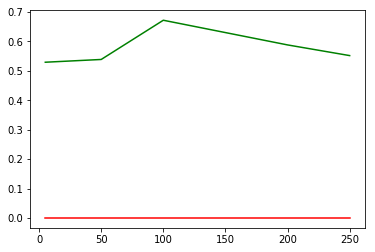

Working on... AMZN


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.5587044534412956
------------
0.5387596899224806
------------
0.5454545454545454
------------
0.5334728033472803
------------
0.5445736434108527
------------
0.5336134453781513
------------
0.5587044534412956
------------
0.5310077519379846
------------
0.5340909090909091
------------
0.5376569037656904
------------
0.5329457364341085
------------
0.5399159663865546
------------
0.5566801619433198
------------
0.5368217054263565
------------
0.5473484848484849
------------
0.5460251046025104
------------
0.5329457364341085
------------
0.5273109243697479
------------
0.5708502024291497
------------
0.5271317829457365
------------
0.5435606060606061
------------
0.5355648535564853
------------
0.5348837209302325
------------
0.5399159663865546
------------
0.5668016194331984
------------
0.563953488372093
------------
0.4943181818181818
------------
0.5334728033472803
------------
0.5310077519379846
------------
0.5063025210084033
------------
0.520242914979757
------------
0.52325581

0.5132575757575758
------------
0.5125523012552301
------------
0.5542635658914729
------------
0.5357142857142857
------------
0.5404858299595142
------------
0.5794573643410853
------------
0.4810606060606061
------------
0.50418410041841
------------
0.5813953488372093
------------
0.5252100840336135
------------
0.48785425101214575
------------
0.563953488372093
------------
0.49242424242424243
------------
0.44142259414225943
------------
0.5755813953488372
------------
0.48739495798319327
------------
0.4757085020242915
------------
0.5
------------
0.48863636363636365
------------
0.4686192468619247
------------
0.5348837209302325
------------
0.5084033613445378
------------
0.5020242914979757
------------
0.501937984496124
------------
0.4962121212121212
------------
0.4895397489539749
------------
0.49612403100775193
------------
0.5084033613445378
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-----------

0.60828025477707
------------
0.492816091954023
------------
0.49032258064516127
------------
0.5154440154440154
------------
0.44886363636363635
------------
0.5501730103806228
------------
0.5668789808917197
------------
0.47270114942528735
------------
0.47580645161290325
------------
0.5096525096525096
------------
0.42803030303030304
------------
0.5467128027681661
------------
0.6305732484076433
------------
0.46695402298850575
------------
0.4467741935483871
------------
0.5096525096525096
------------
0.44507575757575757
------------
0.5069204152249135
------------
0.5636942675159236
------------
0.44971264367816094
------------
0.5
------------
0.5
------------
0.42803030303030304
------------
0.4532871972318339
------------
0.4538216560509554
------------
0.4956896551724138
------------
0.5
------------
0.5
------------
0.5
------------
0.49653979238754326
------------
0.4984076433121019
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
----

0.6212121212121212
------------
0.527681660899654
------------
0.43312101910828027
------------
0.4281609195402299
------------
0.5338709677419354
------------
0.5907335907335908
------------
0.5625
------------
0.4844290657439446
------------
0.4729299363057325
------------
0.5
------------
0.4967741935483871
------------
0.49613899613899615
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5484429065743944
------------
0.6226114649681529
------------
0.47701149425287354
------------
0.5
------------
0.5
------------
0.44507575757575757
------------
0.5882352941176471
------------
0.6289808917197452
------------
0.5
------------
0.5
------------
0.5
------------
0.4640151515151515
------------
0.494809

0.5
------------
0.5
------------
0.5
------------
0.503448275862069
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5442622950819672
------------
0.5453333333333333
------------
0.4695767195767196
------------
0.49658703071672355
------------
0.5064935064935064
------------
0.4879310344827586
------------
0.5704918032786885
------------
0.532
------------
0.4708994708994709
------------
0.4948805460750853
------------
0.49134199134199136
------------
0.4844827586206897
------------
0.5426229508196722
------------
0.532
------------
0.49206349206349204
------------
0.4863481228668942
------------
0.48917748917748916
-

0.5262295081967213
------------
0.488
------------
0.5026455026455027
------------
0.5290102389078498
------------
0.5
------------
0.5948275862068966
------------
0.5163934426229508
------------
0.4746666666666667
------------
0.4894179894179894
------------
0.5648464163822525
------------
0.538961038961039
------------
0.7517241379310344
------------
0.4098360655737705
------------
0.504
------------
0.5119047619047619
------------
0.5870307167235495
------------
0.5476190476190477
------------
0.7293103448275862
------------
0.39344262295081966
------------
0.5413333333333333
------------
0.42857142857142855
------------
0.4778156996587031
------------
0.5541125541125541
------------
0.6551724137931034
------------
0.49836065573770494
------------
0.5053333333333333
------------
0.5
------------
0.4931740614334471
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-

------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4512987012987013
------------
0.48223350253807107
------------
0.5
------------
0.5
------------
0.5
------------
0.46987951807228917
------------
0.43344155844155846
------------
0.4796954314720812
------------
0.5
------------
0.5
------------
0.5
------------
0.4718875502008032
------------
0.41883116883116883
------------
0.5939086294416244
------------
0.5
------------
0.5
------------
0.5
------------
0.46586345381526106
------------
0.4025974025974026
------------
0.5774111675126904
------------
0

0.4645061728395062
------------
0.42407407407407405
------------
0.6807228915662651
------------
0.487012987012987
------------
0.549492385786802
------------
0.5508474576271186
------------
0.5123456790123457
------------
0.3907407407407407
------------
0.6325301204819277
------------
0.49837662337662336
------------
0.4987309644670051
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.487012987012987
------------
0.5850253807106599
------------
0.5
------------
0.5
------------
0.5
------------
0.606425702811245
------------
0.4253246753246753
------------
0.5812182741116751
------------
0.5
------------
0.47685185185185186
------------
0.5
-----------

0.45272206303724927
------------
0.5671641791044776
------------
0.6105527638190955
------------
0.5
------------
0.42077464788732394
------------
0.4366812227074236
------------
0.4670487106017192
------------
0.6915422885572139
------------
0.571608040201005
------------
0.5
------------
0.47007042253521125
------------
0.4519650655021834
------------
0.4871060171919771
------------
0.7375621890547264
------------
0.6092964824120602
------------
0.5
------------
0.49295774647887325
------------
0.4388646288209607
------------
0.46275071633237824
------------
0.7661691542288557
------------
0.435929648241206
------------
0.5
------------
0.5
------------
0.4650655021834061
------------
0.4656160458452722
------------
0.5
------------
0.5
------------
0.4733893557422969
------------
0.4982394366197183
------------
0.7161572052401747
------------
0.5
------------
0.5
------------
0.5
------------
0.49719887955182074
------------
0.47007042253521125
------------
0.537117903930131
-------

0.5764192139737991
------------
0.5
------------
0.5
------------
0.5
------------
0.5042016806722689
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.47277936962750716
------------
0.48880597014925375
------------
0.5
------------
0.4733893557422969
------------
0.5
------------
0.5480349344978166
------------
0.45702005730659023
------------
0.5074626865671642
------------
0.4836683417085427
------------
0.38935574229691877
------------
0.5651408450704225
------------
0.7139737991266376
------------
0.48567335243553006
------------
0.4937810945273632
------------
0.49246231155778897
------------
0.5490196078431373
------------
0.5246478873239436
------------
0.6593886462882096
------

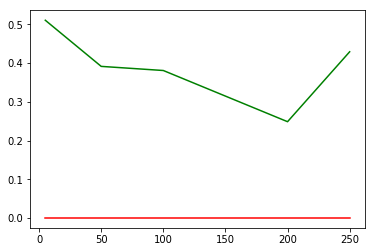

Working on... PEP
0.5814814814814815
------------
0.5
------------
0.46153846153846156
------------
0.4823943661971831
------------
0.5921787709497207
------------
0.5787671232876712
------------
0.5703703703703704
------------
0.506993006993007
------------
0.458041958041958
------------
0.4894366197183099
------------
0.5837988826815642
------------
0.5136986301369864
------------
0.562962962962963
------------
0.493006993006993
------------
0.46853146853146854
------------
0.4894366197183099
------------
0.5810055865921788
------------
0.6027397260273972
------------
0.6037037037037037
------------
0.5
------------
0.45104895104895104
------------
0.4894366197183099
------------
0.5251396648044693
------------
0.5136986301369864
------------
0.5555555555555556
------------
0.4825174825174825
------------
0.44755244755244755
------------
0.45422535211267606
------------
0.553072625698324
------------
0.4897260273972603
------------
0.5074074074074074
------------
0.5244755244755245
-

0.46853146853146854
------------
0.5070422535211268
------------
0.6061452513966481
------------
0.5342465753424658
------------
0.5259259259259259
------------
0.48951048951048953
------------
0.46503496503496505
------------
0.5105633802816901
------------
0.5614525139664804
------------
0.5034246575342466
------------
0.4962962962962963
------------
0.46153846153846156
------------
0.48951048951048953
------------
0.528169014084507
------------
0.5614525139664804
------------
0.4965753424657534
------------
0.5148148148148148
------------
0.5
------------
0.458041958041958
------------
0.4788732394366197
------------
0.5614525139664804
------------
0.5205479452054794
------------
0.5
------------
0.506993006993007
------------
0.493006993006993
------------
0.5035211267605634
------------
0.5
------------
0.5034246575342466
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
--------

0.4201388888888889
------------
0.625
------------
0.5
------------
0.3878504672897196
------------
0.5032894736842105
------------
0.4492753623188406
------------
0.3020833333333333
------------
0.6875
------------
0.5063291139240507
------------
0.4182242990654206
------------
0.6414473684210527
------------
0.48188405797101447
------------
0.25
------------
0.625
------------
0.5759493670886076
------------
0.4182242990654206
------------
0.6348684210526315
------------
0.5108695652173914
------------
0.4618055555555556
------------
0.5880681818181818
------------
0.49683544303797467
------------
0.45560747663551404
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.6051136363636364
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-

0.5460526315789473
------------
0.5
------------
0.4826388888888889
------------
0.53125
------------
0.49683544303797467
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.47101449275362317
------------
0.2777777777777778
------------
0.6732954545454546
------------
0.5221518987341772
------------
0.5350467289719626
------------
0.5164473684210527
------------
0.45652173913043476
------------
0.2152777777777778
------------
0.5994318181818182
------------
0.5253164556962026
------------
0.6285046728971962
------------
0.7138157894736842
------------
0.4891304347826087
------------
0.3055555555555556
------------
0.5568181818181818
------------
0.5316455696202531
------------
0.626168224

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.46875
------------
0.4517241379310345
------------
0.47289156626506024
------------
0.51875
------------
0.8008849557522124
------------
0.6658767772511849
------------
0.4652777777777778
------------
0.46206896551724136
------------
0.46987951807228917
------------
0.5
------------
0.8097345132743363
------------
0.6398104265402843
------------
0.4409722222222222
------------
0.3448275862068966
------------
0.463855421686747
------------
0.5
------------
0.7588495575221239
------------
0.6492890995260664
------------
0.4340277777777778
------------
0.3310344827586207
------------
0.4819277108433735
------------
0.62

0.5
------------
0.5
------------
0.5687203791469194
------------
0.4027777777777778
------------
0.3
------------
0.5301204819277109
------------
0.440625
------------
0.5530973451327433
------------
0.6232227488151659
------------
0.4340277777777778
------------
0.38620689655172413
------------
0.5963855421686747
------------
0.415625
------------
0.6371681415929203
------------
0.5071090047393365
------------
0.4895833333333333
------------
0.42758620689655175
------------
0.5753012048192772
------------
0.421875
------------
0.5287610619469026
------------
0.5592417061611374
------------
0.5
------------
0.5
------------
0.5030120481927711
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
--------

0.33070866141732286
------------
0.5113636363636364
------------
0.5218978102189781
------------
0.41369047619047616
------------
0.5352564102564102
------------
0.7637795275590551
------------
0.968503937007874
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.5
------------
0.4744525547445255
------------
0.4375
------------
0.483974358974359
------------
0.44881889763779526
------------
0.027559055118110236
------------
0.4810606060606061
------------
0.48175182481751827
------------
0.44345238095238093
------------
0.4807692307692308
------------
0.49212598

0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9803149606299213
------------
0.4356060606060606
------------
0.44525547445255476
------------
0.4494047619047619
------------
0.5
------------
0.0
------------
0.01968503937007874
------------
0.5
------------
0.4635036496350365
------------
0.5
------------
0.4967948717948718
------------
0.0
------------
0.01968503937007874
------------
0.5
------------
0.46715328467153283
------------
0.5
------------
0.5416666666666666
------------
0.0
------------
0.027559055118110236
------------
0.5037878787878788
------------
0.40145985401459855
------------
0.48214285714285715
------------
0.5
------------
0.031496062992125984
------------
0.7047244094488189
------------
0.4848

/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.02365930599369085
0.5
------------
0.5
------------
0.5134228187919463
------------
0.6242236024844721
------------
0.256
------------
0.5929752066115702
------------
0.5
------------
0.46598639455782315
------------
0.5134228187919463
------------
0.639751552795031
------------
0.26
------------
0.6033057851239669
------------
0.5
------------
0.5
------------
0.5201342281879194
------------
0.6366459627329193
------------
0.264
------------
0.5888429752066116
------------
0.45985401459854014
------------
0.5204081632653061
------------
0.5100671140939598
------------
0.6180124223602484
------------
0.26
------------
0.5785123966942148
------------
0.4708029197080292
------------
0.5952380952380952
------------
0.4865771812080537
------------
0.6304347826086957
------------
0.196
------------
0.5805785123966942
------------
0.4781021897810219
------------
0.5340136054421769
------------
0.3926174496644295
------------
0.5838509316770186
------------
0.536
----

0.3859060402684564
------------
0.5962732919254659
------------
0.4
------------
0.5557851239669421
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.5
------------
0.4635036496350365
------------
0.47619047619047616
------------
0.5167785234899329
------------
0.6335403726708074
------------
0.228
------------
0.5785123966942148
------------
0.4927007299270073
------------
0.391156462585034
------------
0.5201342281879194
------------
0.6118012422360248
------------
0.096
------------
0.5268595041322314
------------
0.4781021897810219
------------
0.5408163265306123
------------
0.5536912751677853
------------
0.6024844720496895
------

/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.049679487179487176
[0, 0, 0, 200, 100]
[0.5943536404160475, 0.4397590361445783, 0.18654434250764526, 0.02365930599369085, 0.049679487179487176]
accuracy
accuracy


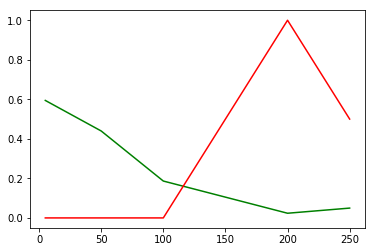

Working on... GOOGL
0.5204918032786885
------------
0.4895397489539749
------------
0.4365079365079365
------------
0.5273109243697479
------------
0.5355731225296443
------------
0.4787234042553192
------------
0.5307377049180327
------------
0.4874476987447699
------------
0.44246031746031744
------------
0.5126050420168067
------------
0.5434782608695652
------------
0.4723404255319149
------------
0.5245901639344263
------------
0.4790794979079498
------------
0.4384920634920635
------------
0.5
------------
0.5395256916996047
------------
0.4787234042553192
------------
0.5368852459016393
------------
0.49581589958158995
------------
0.44047619047619047
------------
0.523109243697479
------------
0.5553359683794467
------------
0.4808510638297872
------------
0.5225409836065574
------------
0.497907949790795
------------
0.45436507936507936
------------
0.5399159663865546
------------
0.5632411067193676
------------
0.5
------------
0.5040983606557377
------------
0.47698744769874

0.5273109243697479
------------
0.525691699604743
------------
0.4787234042553192
------------
0.5102459016393442
------------
0.4686192468619247
------------
0.4603174603174603
------------
0.5336134453781513
------------
0.5059288537549407
------------
0.502127659574468
------------
0.5102459016393442
------------
0.4393305439330544
------------
0.498015873015873
------------
0.5399159663865546
------------
0.48023715415019763
------------
0.4978723404255319
------------
0.5040983606557377
------------
0.46234309623430964
------------
0.4583333333333333
------------
0.5462184873949579
------------
0.5098814229249012
------------
0.46170212765957447
------------
0.48565573770491804
------------
0.5
------------
0.4801587301587302
------------
0.5
------------
0.5
------------
0.502127659574468
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-------

0.5018867924528302
------------
0.6051587301587301
------------
0.4486301369863014
------------
0.44884488448844884
------------
0.4470338983050847
------------
0.44483985765124556
------------
0.5113207547169811
------------
0.6031746031746031
------------
0.4486301369863014
------------
0.4603960396039604
------------
0.4427966101694915
------------
0.47330960854092524
------------
0.5245283018867924
------------
0.6071428571428571
------------
0.4486301369863014
------------
0.4768976897689769
------------
0.375
------------
0.4306049822064057
------------
0.4188679245283019
------------
0.6091269841269841
------------
0.464041095890411
------------
0.466996699669967
------------
0.4936440677966102
------------
0.4412811387900356
------------
0.4528301886792453
------------
0.48214285714285715
------------
0.4280821917808219
------------
0.5016501650165016
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
---------

0.5555555555555556
------------
0.4845890410958904
------------
0.4521452145214521
------------
0.4576271186440678
------------
0.5409252669039146
------------
0.5735849056603773
------------
0.5496031746031746
------------
0.5136986301369864
------------
0.504950495049505
------------
0.4343220338983051
------------
0.4608540925266904
------------
0.4830188679245283
------------
0.5198412698412699
------------
0.547945205479452
------------
0.5066006600660066
------------
0.4978813559322034
------------
0.498220640569395
------------
0.5018867924528302
------------
0.49603174603174605
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.45544554455445546
------------
0.4597457627118644
------------
0.4626

0.5620689655172414
------------
0.46964285714285714
------------
0.5345911949685535
------------
0.40823970037453183
------------
0.4275618374558304
------------
0.5678807947019867
------------
0.5017241379310344
------------
0.42857142857142855
------------
0.48427672955974843
------------
0.41760299625468167
------------
0.5
------------
0.5860927152317881
------------
0.49137931034482757
------------
0.3964285714285714
------------
0.47641509433962265
------------
0.47191011235955055
------------
0.6607773851590106
------------
0.5579470198675497
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5137931034482759
----

0.5842696629213483
------------
0.6395759717314488
------------
0.5529801324503312
------------
0.4827586206896552
------------
0.5017857142857143
------------
0.5
------------
0.5
------------
0.4911660777385159
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5362068965517242
------------
0.4392857142857143
------------
0.5141509433962265
------------
0.4250936329588015
------------
0.39752650176678445
------------
0.6423841059602649
------------
0.5224137931034483
------------
0.45
------------
0.4025157232704403
------------
0.3970037453183521
------------
0.5070671378091873
------------
0.6258278145695364
------------
0.5051724137931034
------------
0.45535714285714285
------------
0.4025157232704

------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5934959349593496
------------
0.6732394366197183
------------
0.4819672131147541
------------
0.448559670781893
------------
0.5
------------
0.5809859154929577
------------
0.6056910569105691
------------
0.6732394366197183
------------
0.46885245901639344
------------
0.4382716049382716
------------
0.5055147058823529
------------
0.5580985915492958
------------
0.5995934959349594
------------
0.6816901408450704
------------
0.4885245901639344
------------
0.4218106995884774
------------
0.5367647058823529
------------
0.5616197183098591
------------
0.5975609756097561

0.5
------------
0.5
------------
0.5894308943089431
------------
0.6830985915492958
------------
0.419672131147541
------------
0.4794238683127572
------------
0.5900735294117647
------------
0.6355633802816901
------------
0.6971544715447154
------------
0.5915492957746479
------------
0.4540983606557377
------------
0.5967078189300411
------------
0.6213235294117647
------------
0.596830985915493
------------
0.7682926829268293
------------
0.5098591549295775
------------
0.34098360655737703
------------
0.5740740740740741
------------
0.6599264705882353
------------
0.5369718309859155
------------
0.8191056910569106
------------
0.528169014084507
------------
0.30655737704918035
------------
0.676954732510288
------------
0.6654411764705882
------------
0.5633802816901409
------------
0.7804878048780488
------------
0.5830985915492958
------------
0.5032786885245901
------------
0.602880658436214
------------
0.5900735294117647
------------
0.5809859154929577
------------
0.7235772

0.7185792349726776
------------
0.5732142857142857
------------
0.5288888888888889
------------
0.5798319327731093
------------
0.4806201550387597
------------
0.5900900900900901
------------
0.6912568306010929
------------
0.5714285714285714
------------
0.5355555555555556
------------
0.5630252100840336
------------
0.47093023255813954
------------
0.5990990990990991
------------
0.6967213114754098
------------
0.5857142857142857
------------
0.54
------------
0.5546218487394958
------------
0.5038759689922481
------------
0.5923423423423423
------------
0.6707650273224044
------------
0.5946428571428571
------------
0.5311111111111111
------------
0.5609243697478992
------------
0.4806201550387597
------------
0.5968468468468469
------------
0.6844262295081968
------------
0.6107142857142858
------------
0.5511111111111111
------------
0.5609243697478992
------------
0.47674418604651164
------------
0.6058558558558559
------------
0.605191256830601
------------
0.5017857142857143
--

0.5
------------
0.5196428571428572
------------
0.6222222222222222
------------
0.6449579831932774
------------
0.5678294573643411
------------
0.7612612612612613
------------
0.5163934426229508
------------
0.5375
------------
0.5733333333333334
------------
0.6449579831932774
------------
0.6046511627906976
------------
0.7635135135135135
------------
0.5601092896174863
------------
0.5464285714285714
------------
0.5533333333333333
------------
0.6239495798319328
------------
0.622093023255814
------------
0.6981981981981982
------------
0.5737704918032787
------------
0.41964285714285715
------------
0.5911111111111111
------------
0.6218487394957983
------------
0.5755813953488372
------------
0.49774774774774777
------------
0.4959016393442623
------------
0.5
------------
0.5022222222222222
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
---

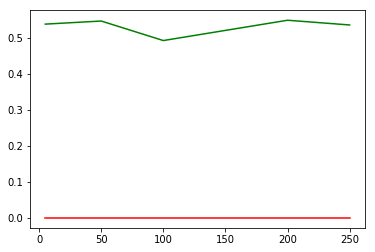

Working on... MSFT
0.5354166666666667
------------
0.5255319148936171
------------
0.5078431372549019
------------
0.47843137254901963
------------
0.5102040816326531
------------
0.5266393442622951
------------
0.5395833333333333
------------
0.5276595744680851
------------
0.5078431372549019
------------
0.4843137254901961
------------
0.5
------------
0.5327868852459017
------------
0.5354166666666667
------------
0.5382978723404256
------------
0.4980392156862745
------------
0.47058823529411764
------------
0.5
------------
0.5348360655737705
------------
0.55
------------
0.5255319148936171
------------
0.5058823529411764
------------
0.49607843137254903
------------
0.5020408163265306
------------
0.5286885245901639
------------
0.5416666666666666
------------
0.5276595744680851
------------
0.4980392156862745
------------
0.4980392156862745
------------
0.5020408163265306
------------
0.5327868852459017
------------
0.53125
------------
0.5127659574468085
------------
0.5039215

0.5163265306122449
------------
0.514344262295082
------------
0.5666666666666667
------------
0.5234042553191489
------------
0.5411764705882353
------------
0.5137254901960784
------------
0.4959183673469388
------------
0.5122950819672131
------------
0.5229166666666667
------------
0.5382978723404256
------------
0.503921568627451
------------
0.5
------------
0.5306122448979592
------------
0.5163934426229508
------------
0.55625
------------
0.4808510638297872
------------
0.49607843137254903
------------
0.5333333333333333
------------
0.5081632653061224
------------
0.5327868852459017
------------
0.49583333333333335
------------
0.49361702127659574
------------
0.5058823529411764
------------
0.5058823529411764
------------
0.5020408163265306
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5


0.6
------------
0.5128205128205128
------------
0.5550847457627118
------------
0.60431654676259
------------
0.6040955631399317
------------
0.5960264900662252
------------
0.5698412698412698
------------
0.5091575091575091
------------
0.5677966101694916
------------
0.6205035971223022
------------
0.6177474402730375
------------
0.5910596026490066
------------
0.580952380952381
------------
0.48534798534798534
------------
0.5783898305084746
------------
0.6294964028776978
------------
0.5972696245733788
------------
0.5728476821192053
------------
0.526984126984127
------------
0.47802197802197804
------------
0.5190677966101694
------------
0.4316546762589928
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
---

0.5360169491525424
------------
0.4658273381294964
------------
0.6075085324232082
------------
0.5231788079470199
------------
0.36984126984126986
------------
0.4652014652014652
------------
0.5826271186440678
------------
0.5179856115107914
------------
0.49658703071672355
------------
0.4867549668874172
------------
0.49206349206349204
------------
0.5
------------
0.4957627118644068
------------
0.4982014388489209
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.6245733788395904
------------
0.5562913907284768
------------
0.5412698412698412
------------
0.5366300366300366
------------
0.5953389830508474
------------
0.6061151079136691
------------
0.5170648464163823
------------
0.5960264900662252
------------
0.

------------
0.5652173913043478
------------
0.48014440433212996
------------
0.49466192170818507
------------
0.5
------------
0.6209912536443148
------------
0.4383116883116883
------------
0.43478260869565216
------------
0.48194945848375453
------------
0.47686832740213525
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5058309037900874
------------
0.551948051948052
------------
0.5492753623188406
------------
0.5144404332129964
------------
0.49110320284697506
------------
0.5119402985074627
------------
0.5247813411078717
------------
0.5535714285714286
------------
0.5565217391304348
---------

0.4868804664723032
------------
0.5340909090909091
------------
0.5521739130434783
------------
0.5415162454873647
------------
0.45195729537366547
------------
0.5
------------
0.5364431486880467
------------
0.5113636363636364
------------
0.5043478260869565
------------
0.48014440433212996
------------
0.4608540925266904
------------
0.5
------------
0.5145772594752187
------------
0.5275974025974026
------------
0.5028985507246376
------------
0.4981949458483754
------------
0.47686832740213525
------------
0.5
------------
0.607871720116618
------------
0.4772727272727273
------------
0.508695652173913
------------
0.4332129963898917
------------
0.3932384341637011
------------
0.5701492537313433
------------
0.6341107871720116
------------
0.48863636363636365
------------
0.5434782608695652
------------
0.44765342960288806
------------
0.36298932384341637
------------
0.655223880597015
------------
0.5451895043731778
------------
0.400974025974026
------------
0.5608695652173913


0.565015479876161
------------
0.4430769230769231
------------
0.5971014492753624
------------
0.5625
------------
0.4850498338870432
------------
0.5093632958801498
------------
0.5526315789473685
------------
0.4430769230769231
------------
0.5391304347826087
------------
0.4573170731707317
------------
0.4867109634551495
------------
0.5243445692883895
------------
0.5510835913312694
------------
0.4307692307692308
------------
0.5898550724637681
------------
0.5365853658536586
------------
0.5099667774086378
------------
0.49812734082397003
------------
0.5294117647058824
------------
0.40615384615384614
------------
0.5478260869565217
------------
0.5076219512195121
------------
0.5033222591362126
------------
0.49250936329588013
------------
0.5619195046439629
------------
0.4153846153846154
------------
0.5405797101449276
------------
0.46189024390243905
------------
0.49667774086378735
------------
0.5299625468164794
------------
0.5959752321981424
------------
0.5
------------

0.5420289855072464
------------
0.4024390243902439
------------
0.5664451827242525
------------
0.5093632958801498
------------
0.7832817337461301
------------
0.5015384615384615
------------
0.5289855072463768
------------
0.3597560975609756
------------
0.5996677740863787
------------
0.42134831460674155
------------
0.7925696594427245
------------
0.43538461538461537
------------
0.5579710144927537
------------
0.3704268292682927
------------
0.584717607973422
------------
0.4550561797752809
------------
0.6362229102167183
------------
0.4969230769230769
------------
0.5028985507246376
------------
0.5
------------
0.5
------------
0.49812734082397003
------------
0.5108359133126935
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5

0.4147727272727273
------------
0.6671270718232044
------------
0.5864197530864198
------------
0.5530546623794212
------------
0.5641592920353983
------------
0.597444089456869
------------
0.4247159090909091
------------
0.5193370165745856
------------
0.5447530864197531
------------
0.6012861736334405
------------
0.5752212389380531
------------
0.6693290734824281
------------
0.3934659090909091
------------
0.46685082872928174
------------
0.4861111111111111
------------
0.5369774919614148
------------
0.6305309734513275
------------
0.6884984025559105
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.35227272727272

------------
0.3849431818181818
------------
0.5138121546961326
------------
0.470679012345679
------------
0.5610932475884244
------------
0.6570796460176991
------------
0.6677316293929713
------------
0.49857954545454547
------------
0.4958563535911602
------------
0.5
------------
0.5
------------
0.5
------------
0.5015974440894568
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.49573863636363635
------------
0.511049723756906
------------
0.49382716049382713
------------
0.5884244372990354
------------
0.5862831858407079
------------
0.7603833865814696
------------
0.48295454545454547
------------
0.5
------------
0.48148148148148145
------------
0.5546623794212219
------------
0.6703539823008849
------------
0.

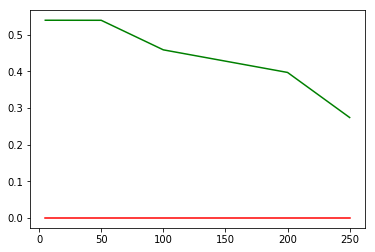

Working on... FB


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.5104166666666666
------------
0.5155642023346303
------------
0.559322033898305
------------
0.4851063829787234
------------
0.47863247863247865
------------
0.5609243697478992
------------
0.5104166666666666
------------
0.5116731517509727
------------
0.5572033898305084
------------
0.4808510638297872
------------
0.47863247863247865
------------
0.5525210084033614
------------
0.5104166666666666
------------
0.5214007782101168
------------
0.565677966101695
------------
0.4787234042553192
------------
0.48717948717948717
------------
0.5546218487394958
------------
0.5020833333333333
------------
0.5214007782101168
------------
0.548728813559322
------------
0.4765957446808511
------------
0.48717948717948717
------------
0.569327731092437
------------
0.5020833333333333
------------
0.5486381322957199
------------
0.5550847457627118
------------
0.4702127659574468
------------
0.49145299145299143
------------
0.5567226890756303
------------
0.5020833333333333
------------
0.55058

0.4829059829059829
------------
0.5525210084033614
------------
0.49166666666666664
------------
0.5233463035019456
------------
0.5317796610169492
------------
0.48723404255319147
------------
0.4722222222222222
------------
0.5336134453781513
------------
0.51875
------------
0.5350194552529183
------------
0.5402542372881356
------------
0.451063829787234
------------
0.46794871794871795
------------
0.5483193277310925
------------
0.48541666666666666
------------
0.519455252918288
------------
0.5063559322033898
------------
0.44042553191489364
------------
0.5341880341880342
------------
0.5126050420168067
------------
0.4708333333333333
------------
0.5680933852140078
------------
0.5296610169491526
------------
0.4723404255319149
------------
0.5726495726495726
------------
0.5084033613445378
------------
0.5166666666666667
------------
0.5817120622568094
------------
0.4936440677966102
------------
0.5148936170212766
------------
0.5170940170940171
------------
0.51890756302521

0.506198347107438
------------
0.4935897435897436
------------
0.4894957983193277
------------
0.322463768115942
------------
0.560377358490566
------------
0.4725490196078431
------------
0.5103305785123967
------------
0.5042735042735043
------------
0.4810924369747899
------------
0.3278985507246377
------------
0.5660377358490566
------------
0.4843137254901961
------------
0.5351239669421488
------------
0.5128205128205128
------------
0.5105042016806722
------------
0.34057971014492755
------------
0.6169811320754717
------------
0.5372549019607843
------------
0.5661157024793388
------------
0.5192307692307693
------------
0.5147058823529411
------------
0.3333333333333333
------------
0.5679245283018868
------------
0.5980392156862745
------------
0.5247933884297521
------------
0.4893162393162393
------------
0.5168067226890757
------------
0.47101449275362317
------------
0.5075471698113208
------------
0.5
------------
0.5
------------
0.5
------------
0.5063025210084033
---

0.6136363636363636
------------
0.5085470085470085
------------
0.5189075630252101
------------
0.5054347826086957
------------
0.49433962264150944
------------
0.5235294117647059
------------
0.6239669421487604
------------
0.5747863247863247
------------
0.5819327731092437
------------
0.5235507246376812
------------
0.4547169811320755
------------
0.5509803921568628
------------
0.46487603305785125
------------
0.49786324786324787
------------
0.6176470588235294
------------
0.5561594202898551
------------
0.5037735849056604
------------
0.5333333333333333
------------
0.5103305785123967
------------
0.4893162393162393
------------
0.5336134453781513
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.

0.5533088235294118
------------
0.5
------------
0.5287162162162162
------------
0.5367647058823529
------------
0.51171875
------------
0.5275862068965518
------------
0.5588235294117647
------------
0.4978813559322034
------------
0.5337837837837838
------------
0.48823529411764705
------------
0.560546875
------------
0.503448275862069
------------
0.5680147058823529
------------
0.5063559322033898
------------
0.518581081081081
------------
0.4838235294117647
------------
0.5390625
------------
0.5413793103448276
------------
0.5974264705882353
------------
0.4894067796610169
------------
0.5388513513513513
------------
0.4485294117647059
------------
0.498046875
------------
0.5
------------
0.5
------------
0.5
------------
0.5016891891891891
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
---

0.5293103448275862
------------
0.5
------------
0.5084745762711864
------------
0.5
------------
0.49264705882352944
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.51953125
------------
0.5120689655172413
------------
0.5735294117647058
------------
0.5084745762711864
------------
0.5
------------
0.5529411764705883
------------
0.568359375
------------
0.5258620689655172
------------
0.6176470588235294
------------
0.5169491525423728
------------
0.5489864864864865
------------
0.5441176470588235
------------
0.591796875
------------
0.5224137931034483
------------
0.6011029411764706
------------
0.5889830508474576
------------
0.5506756756756757
------------
0.5352941176470588
------------
0.564453125
------------

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.558
------------
0.5786026200873362
------------
0.5625
------------
0.5276595744680851
------------
0.5897887323943662
------------
0.4281150159744409
------------
0.56
------------
0.5829694323144105
------------
0.5846774193548387
------------
0.5276595744680851
------------
0.596830985915493
------------
0.43450479233226835
------------
0.556
------------
0.5764192139737991
------------
0.5806451612903226
------------
0.5234042553191489
------------
0.5845070422535211
------------
0.4249201277955272
------------
0.576
------------
0.5633187772925764
------------
0.5846774193548387
------------
0.5255319148936171
------------
0.5721830985915493
------------
0.4073482428115016
------------
0.526
------------
0.5393013100436681
------------
0.5826612903225806
------------
0.48936170212765956
------------
0.605633802

0.5
------------
0.656
------------
0.5851528384279476
------------
0.655241935483871
------------
0.4978723404255319
------------
0.7147887323943662
------------
0.4936102236421725
------------
0.574
------------
0.5
------------
0.6633064516129032
------------
0.4851063829787234
------------
0.6725352112676056
------------
0.49201277955271566
------------
0.516
------------
0.48034934497816595
------------
0.5241935483870968
------------
0.5063829787234042
------------
0.5334507042253521
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.66
------------
0.519650655021834
------------
0.6391129032258065
------------
0.551063829787234
------------
0.7024647887323944
------------
0.5
------------
0.762
--

0.5
------------
0.5
------------
0.5019607843137255
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5970695970695971
------------
0.646484375
------------
0.5758928571428571
------------
0.5205992509363296
------------
0.5764705882352941
------------
0.4370629370629371
------------
0.575091575091575
------------
0.658203125
------------
0.5825892857142857
------------
0.5187265917602997
------------
0.5627450980392157
------------
0.4458041958041958
------------
0.5769230769230769
------------
0.625
------------
0.5803571428571429
------------
0.5112359550561798
------------
0.5607843137254902
------------
0.4493006993006993
------------
0.5824175824175825
------------
0.638671875
------------
0.5803

0.6215686274509804
------------
0.5541958041958042
------------
0.8498168498168498
------------
0.55859375
------------
0.703125
------------
0.7265917602996255
------------
0.6529411764705882
------------
0.5611888111888111
------------
0.793040293040293
------------
0.541015625
------------
0.7120535714285714
------------
0.6891385767790262
------------
0.6607843137254902
------------
0.541958041958042
------------
0.7106227106227107
------------
0.587890625
------------
0.7366071428571429
------------
0.702247191011236
------------
0.692156862745098
------------
0.5437062937062938
------------
0.5164835164835165
------------
0.658203125
------------
0.6875
------------
0.6666666666666666
------------
0.611764705882353
------------
0.548951048951049
------------
0.5989010989010989
------------
0.541015625
------------
0.6629464285714286
------------
0.6123595505617978
------------
0.6372549019607843
------------
0.5314685314685315
------------
0.510989010989011
------------
0.5136718

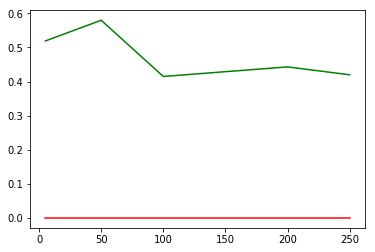

Working on... INTC
0.5468085106382978
------------
0.44017094017094016
------------
0.46120689655172414
------------
0.5502008032128514
------------
0.5198412698412699
------------
0.5
------------
0.5531914893617021
------------
0.43803418803418803
------------
0.46120689655172414
------------
0.5522088353413654
------------
0.5277777777777778
------------
0.4979253112033195
------------
0.5446808510638298
------------
0.4423076923076923
------------
0.46120689655172414
------------
0.5602409638554217
------------
0.5158730158730159
------------
0.495850622406639
------------
0.551063829787234
------------
0.4444444444444444
------------
0.44396551724137934
------------
0.5040160642570282
------------
0.5178571428571429
------------
0.4896265560165975
------------
0.5319148936170213
------------
0.4337606837606838
------------
0.41594827586206895
------------
0.4919678714859438
------------
0.5138888888888888
------------
0.4896265560165975
------------
0.5638297872340425
------------

0.5319148936170213
------------
0.46794871794871795
------------
0.4978448275862069
------------
0.5321285140562249
------------
0.48214285714285715
------------
0.45020746887966806
------------
0.5191489361702127
------------
0.46794871794871795
------------
0.5021551724137931
------------
0.5020080321285141
------------
0.5
------------
0.4730290456431535
------------
0.5936170212765958
------------
0.5
------------
0.5560344827586207
------------
0.5080321285140562
------------
0.5059523809523809
------------
0.5518672199170125
------------
0.5638297872340425
------------
0.48717948717948717
------------
0.5323275862068966
------------
0.5020080321285141
------------
0.5257936507936508
------------
0.5414937759336099
------------
0.5127659574468085
------------
0.5021367521367521
------------
0.4892241379310345
------------
0.4839357429718876
------------
0.498015873015873
------------
0.495850622406639
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------

------------
0.4841549295774648
------------
0.5872340425531914
------------
0.5323886639676113
------------
0.5208333333333334
------------
0.5109090909090909
------------
0.3903846153846154
------------
0.4788732394366197
------------
0.5914893617021276
------------
0.5384615384615384
------------
0.5260416666666666
------------
0.5181818181818182
------------
0.39807692307692305
------------
0.4823943661971831
------------
0.6021276595744681
------------
0.5404858299595142
------------
0.5225694444444444
------------
0.5272727272727272
------------
0.36923076923076925
------------
0.46830985915492956
------------
0.6085106382978723
------------
0.5121457489878543
------------
0.5121527777777778
------------
0.5054545454545455
------------
0.4076923076923077
------------
0.5017605633802817
------------
0.5170212765957447
------------
0.52834008097166
------------
0.4861111111111111
------------
0.5454545454545454
------------
0.4153846153846154
------------
0.5
------------
0.5
-----

------------
0.5384615384615384
------------
0.5211267605633803
------------
0.5191489361702127
------------
0.6072874493927125
------------
0.5086805555555556
------------
0.5072727272727273
------------
0.4442307692307692
------------
0.5580985915492958
------------
0.5255319148936171
------------
0.5
------------
0.4861111111111111
------------
0.5181818181818182
------------
0.5038461538461538
------------
0.5035211267605634
------------
0.49148936170212765
------------
0.49190283400809715
------------
0.4878472222222222
------------
0.49818181818181817
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4665492957746479
------------
0.597872340425532
------------
0.548582995951417
------------
0.4861

0.48026315789473684
------------
0.5018796992481203
------------
0.46192052980132453
------------
0.5944055944055944
------------
0.5798611111111112
------------
0.482258064516129
------------
0.5
------------
0.5
------------
0.4552980132450331
------------
0.5541958041958042
------------
0.4809027777777778
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4503311258278146
------------
0.5244755244755245
------------
0.5555555555555556
------------
0.4935483870967742
------------
0.48848684210526316
------------
0.5169172932330827
------------
0.445364238410596
-------

------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4552980132450331
------------
0.6188811188811189
------------
0.5381944444444444
------------
0.5016129032258064
------------
0.5
------------
0.5
------------
0.48841059602649006
------------
0.6066433566433567
------------
0.5486111111111112
------------
0.4967741935483871
------------
0.5
------------
0.5131578947368421
------------
0.49337748344370863
------------
0.6153846153846154
------------
0.5347222222222222
------------
0.4935483870967742
------------
0.5
------------
0.5037593984962406
------------
0.5149006622516556
------------
0.6153846153846154
------------
0.5052083333333334
------------
0.5096774193548387
------------
0.5
------------
0.5338345864661654
------------
0.5314569536423841
------------
0.6363636363636364
------------
0.5190972222222222
------------
0.5177419354838709
------------
0.5164473684210527
------------
0.49248120300

0.6313868613138686
------------
0.5111821086261981
------------
0.6133540372670807
------------
0.5673400673400674
------------
0.462406015037594
------------
0.4723076923076923
------------
0.6514598540145985
------------
0.5
------------
0.6242236024844721
------------
0.5572390572390572
------------
0.4680451127819549
------------
0.4676923076923077
------------
0.6441605839416058
------------
0.5031948881789138
------------
0.6086956521739131
------------
0.5488215488215489
------------
0.462406015037594
------------
0.4753846153846154
------------
0.6386861313868614
------------
0.5415335463258786
------------
0.6086956521739131
------------
0.5420875420875421
------------
0.4492481203007519
------------
0.52
------------
0.6058394160583942
------------
0.6054313099041534
------------
0.562111801242236
------------
0.5538720538720538
------------
0.4943609022556391
------------
0.5553846153846154
------------
0.5109489051094891
------------
0.4169329073482428
------------
0.625776

0.7098540145985401
------------
0.5623003194888179
------------
0.5357142857142857
------------
0.5387205387205387
------------
0.6560150375939849
------------
0.6923076923076923
------------
0.6697080291970803
------------
0.6006389776357828
------------
0.5450310559006211
------------
0.5488215488215489
------------
0.6560150375939849
------------
0.5061538461538462
------------
0.5072992700729927
------------
0.5031948881789138
------------
0.5015527950310559
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5054744525547445
------------
0.5814696485623003
------------
0.5015527950310559
------------
0.5
------------
0.5300751879699248
------------
0.4969230769230769

------------
0.5
------------
0.5130293159609121
------------
0.5183673469387755
------------
0.5571428571428572
------------
0.5333333333333333
------------
0.46676737160120846
------------
0.6964285714285714
------------
0.503257328990228
------------
0.6244897959183674
------------
0.5
------------
0.5018518518518519
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.46190476190476193
------------
0.6129629629629629
------------
0.4380664652567976
------------
0.5551948051948052
------------
0.5635179153094463
------------
0.5224489795918368
------------
0.46190476190476193
------------
0.6185185185185185
------------
0.4637462235649547
------------
0

------------
0.4984126984126984
------------
0.5611111111111111
------------
0.5362537764350453
------------
0.5211038961038961
------------
0.5
------------
0.5857142857142857
------------
0.4984126984126984
------------
0.5648148148148148
------------
0.527190332326284
------------
0.6266233766233766
------------
0.504885993485342
------------
0.7387755102040816
------------
0.49523809523809526
------------
0.5185185185185185
------------
0.5709969788519638
------------
0.6834415584415584
------------
0.5228013029315961
------------
0.8122448979591836
------------
0.4793650793650794
------------
0.6555555555555556
------------
0.676737160120846
------------
0.6607142857142857
------------
0.5146579804560261
------------
0.863265306122449
------------
0.6317460317460317
------------
0.7555555555555555
------------
0.6193353474320241
------------
0.6590909090909091
------------
0.5309446254071661
------------
0.8040816326530612
------------
0.6031746031746031
------------
0.76851851851

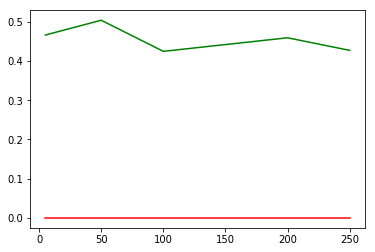

Working on... CSCO


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.4904580152671756
------------
0.5
------------
0.418
------------
0.4150197628458498
------------
0.561965811965812
------------
0.524896265560166
------------
0.5133587786259542
------------
0.5038759689922481
------------
0.406
------------
0.41304347826086957
------------
0.5427350427350427
------------
0.5124481327800829
------------
0.5209923664122137
------------
0.5096899224806202
------------
0.408
------------
0.41106719367588934
------------
0.5405982905982906
------------
0.516597510373444
------------
0.5
------------
0.5213178294573644
------------
0.426
------------
0.41106719367588934
------------
0.5
------------
0.5062240663900415
------------
0.4904580152671756
------------
0.5310077519379846
------------
0.44
------------
0.5059288537549407
------------
0.48717948717948717
------------
0.4854771784232365
------------
0.49236641221374045
------------
0.5
------------
0.5
------------
0.5375494071146245
------------
0.48504273504273504
------------
0.495850622406639


0.5311203319502075
------------
0.5
------------
0.49224806201550386
------------
0.498
------------
0.49407114624505927
------------
0.49786324786324787
------------
0.49377593360995853
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.49809160305343514
------------
0.49612403100775193
------------
0.422
------------
0.40711462450592883
------------
0.5427350427350427
------------
0.5124481327800829
------------
0.5133587786259542
------------
0.5038759689922481
------------
0.442
------------
0.4426877470355731
------------
0.5427350427350427
------------
0.504149377593361
------------
0.5209923664122137
------------
0.46511627906976744
------------
0.478
------------
0.49209486166007904
------------
0.512820512820512

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5202492211838006
------------
0.5494011976047904
------------
0.44809688581314877
------------
0.4354243542435424
------------
0.5228136882129277
------------
0.5218978102189781
------------
0.5498442367601246
------------
0.5763473053892215
------------
0.46539792387543255
------------
0.41697416974169743
------------
0.5114068441064639
------------
0.5145985401459854
------------
0.5545171339563862
------------
0.5598802395209581
------------
0.45674740484429066
------------
0.43726937269372695
------------
0.5304182509505704
------------
0.531021897810219
------------
0.5420560747663551
------------
0.5389221556886228
------------
0.4515570934256055
------------
0.470479704797048
------------
0.532319391634981
------------
0.5018248175182481
-----

------------
0.5361216730038023
------------
0.4927007299270073
------------
0.5155763239875389
------------
0.592814371257485
------------
0.4757785467128028
------------
0.4483394833948339
------------
0.5931558935361216
------------
0.5182481751824818
------------
0.5
------------
0.5973053892215568
------------
0.5432525951557093
------------
0.37084870848708484
------------
0.6064638783269962
------------
0.5018248175182481
------------
0.5
------------
0.5359281437125748
------------
0.43079584775086505
------------
0.37084870848708484
------------
0.5057034220532319
------------
0.49452554744525545
------------
0.5186915887850467
------------
0.47155688622754494
------------
0.4688581314878893
------------
0.551660516605166
------------
0.5532319391634981
------------
0.5182481751824818
------------
0.5825545171339563
------------
0.4625748502994012
------------
0.4619377162629758
------------
0.6254612546125461
------------
0.6159695817490495
------------
0.4726277372262774
---

------------
0.44821428571428573
------------
0.5017985611510791
------------
0.548941798941799
------------
0.48247978436657685
------------
0.4030612244897959
------------
0.5145454545454545
------------
0.4589285714285714
------------
0.5
------------
0.5357142857142857
------------
0.5
------------
0.4166666666666667
------------
0.5036363636363637
------------
0.475
------------
0.5
------------
0.5317460317460317
------------
0.5067385444743935
------------
0.3945578231292517
------------
0.4381818181818182
------------
0.5339285714285714
------------
0.5089928057553957
------------
0.6256613756613757
------------
0.4919137466307278
------------
0.5
------------
0.5145454545454545
------------
0.49642857142857144
------------
0.5071942446043165
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-

0.6124338624338624
------------
0.4838274932614555
------------
0.4812925170068027
------------
0.5018181818181818
------------
0.38571428571428573
------------
0.4370503597122302
------------
0.5
------------
0.5080862533692723
------------
0.5
------------
0.5018181818181818
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.533068783068783
------------
0.46495956873315364
------------
0.4030612244897959
------------
0.4890909090909091
------------
0.48392857142857143
------------
0.4802158273381295
------------
0.5
------------
0.5040431266846361
------------
0.3758503401360544
------------
0.44363636363636366
------------
0.4357142857142857
------------
0.4694244604316547
-----------

0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.669047619047619
------------
0.602112676056338
------------
0.4743150684931507
------------
0.4025157232704403
------------
0.5079051383399209
------------
0.5344827586206896
------------
0.6642857142857143
------------
0.6056338028169014
------------
0.4623287671232877
------------
0.3977987421383648
------------
0.49604743083003955
------------
0.5287356321839081
------------
0.6619047619047619
------------
0.5762910798122066
------------
0.4434931506849315
------------
0.40723270440251574
------------
0.5
------------
0.5134099616858238
------------
0.6571428571428571
------------
0.63028169014084

------------
0.5011904761904762
------------
0.7582159624413145
------------
0.4863013698630137
------------
0.3805031446540881
------------
0.5197628458498024
------------
0.7528735632183908
------------
0.5011904761904762
------------
0.7194835680751174
------------
0.4811643835616438
------------
0.389937106918239
------------
0.4624505928853755
------------
0.8333333333333334
------------
0.5464285714285714
------------
0.5
------------
0.5
------------
0.5864779874213837
------------
0.49604743083003955
------------
0.7662835249042146
------------
0.6107142857142858
------------
0.5
------------
0.4965753424657534
------------
0.6289308176100629
------------
0.5513833992094862
------------
0.6877394636015326
------------
0.513095238095238
------------
0.49765258215962443
------------
0.5
------------
0.6949685534591195
------------
0.4901185770750988
------------
0.6436781609195402
------------
0.49642857142857144
------------
0.5
------------
0.5
------------
0.5
------------
0.5

0.5203619909502263
------------
0.5540540540540541
------------
0.5105105105105106
------------
0.5607287449392713
------------
0.5585774058577406
------------
0.47058823529411764
------------
0.5226244343891403
------------
0.5861486486486487
------------
0.506006006006006
------------
0.5587044534412956
------------
0.5439330543933054
------------
0.5542986425339367
------------
0.6855203619909502
------------
0.518581081081081
------------
0.524024024024024
------------
0.5748987854251012
------------
0.604602510460251
------------
0.7737556561085973
------------
0.9864253393665159
------------
0.5
------------
0.496996996996997
------------
0.5161943319838057
------------
0.7092050209205021
------------
1.0
------------
0.9932126696832579
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9932126696832579
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9932126696832579
------------


0.5995475113122172
------------
0.9932126696832579
------------
0.5
------------
0.7852852852852853
------------
0.6781376518218624
------------
0.6924686192468619
------------
0.6923076923076923
------------
0.9932126696832579
------------
0.5
------------
0.5945945945945946
------------
0.6821862348178138
------------
0.6569037656903766
------------
0.995475113122172
------------
0.9932126696832579
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9932126696832579
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9932126696832579
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
1.0
------------
0.9932126696832579
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.02262443438914027
------------
0.751131221719457
------------
0.48817567567567566
------------
0.42792792792792794
------------
0.6578947368421053
------------
0.

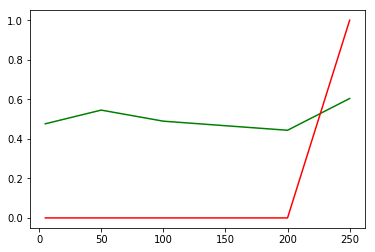

Working on... CMCSA


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.5308641975308642
------------
0.5275590551181102
------------
0.5594262295081968
------------
0.48125
------------
0.5383141762452107
------------
0.5303030303030303
------------
0.5390946502057613
------------
0.5413385826771654
------------
0.5573770491803278
------------
0.47708333333333336
------------
0.524904214559387
------------
0.5281385281385281
------------
0.5411522633744856
------------
0.5413385826771654
------------
0.5635245901639344
------------
0.48125
------------
0.5325670498084292
------------
0.5324675324675324
------------
0.5473251028806584
------------
0.5354330708661418
------------
0.5573770491803278
------------
0.4875
------------
0.524904214559387
------------
0.5238095238095238
------------
0.5493827160493827
------------
0.5492125984251969
------------
0.555327868852459
------------
0.48125
------------
0.5287356321839081
------------
0.5216450216450217
------------
0.522633744855967
------------
0.5688976377952756
------------
0.5532786885245902
-----

0.5413385826771654
------------
0.5614754098360656
------------
0.475
------------
0.5287356321839081
------------
0.525974025974026
------------
0.5061728395061729
------------
0.5846456692913385
------------
0.5635245901639344
------------
0.4583333333333333
------------
0.5555555555555556
------------
0.5194805194805194
------------
0.49176954732510286
------------
0.5137795275590551
------------
0.5840163934426229
------------
0.475
------------
0.4942528735632184
------------
0.45454545454545453
------------
0.48559670781893005
------------
0.5374015748031497
------------
0.5348360655737705
------------
0.51875
------------
0.46551724137931033
------------
0.47835497835497837
------------
0.5164609053497943
------------
0.4921259842519685
------------
0.5102459016393442
------------
0.5083333333333333
------------
0.48659003831417624
------------
0.48917748917748916
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0

0.5234657039711191
------------
0.5095541401273885
------------
0.5747863247863247
------------
0.501937984496124
------------
0.5342741935483871
------------
0.5627450980392157
------------
0.5288808664259927
------------
0.5079617834394905
------------
0.5683760683760684
------------
0.5077519379844961
------------
0.5221774193548387
------------
0.5529411764705883
------------
0.5415162454873647
------------
0.5191082802547771
------------
0.5790598290598291
------------
0.5
------------
0.5443548387096774
------------
0.5764705882352941
------------
0.5505415162454874
------------
0.5238853503184714
------------
0.5726495726495726
------------
0.5038759689922481
------------
0.592741935483871
------------
0.5235294117647059
------------
0.5108303249097473
------------
0.5207006369426752
------------
0.5576923076923077
------------
0.5
------------
0.5
------------
0.5058823529411764
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.

0.5665322580645161
------------
0.5470588235294118
------------
0.648014440433213
------------
0.5318471337579618
------------
0.5833333333333334
------------
0.4186046511627907
------------
0.5846774193548387
------------
0.6078431372549019
------------
0.5776173285198556
------------
0.5589171974522293
------------
0.4829059829059829
------------
0.46705426356589147
------------
0.5362903225806451
------------
0.5215686274509804
------------
0.42418772563176893
------------
0.5493630573248408
------------
0.4893162393162393
------------
0.501937984496124
------------
0.4959677419354839
------------
0.49607843137254903
------------
0.4620938628158845
------------
0.5207006369426752
------------
0.49786324786324787
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
---

0.6051873198847262
------------
0.5808510638297872
------------
0.49044585987261147
------------
0.5548961424332344
------------
0.5321888412017167
------------
0.49119718309859156
------------
0.6109510086455331
------------
0.5808510638297872
------------
0.5
------------
0.5519287833827893
------------
0.5236051502145923
------------
0.4841549295774648
------------
0.6498559077809798
------------
0.5659574468085107
------------
0.5366242038216561
------------
0.5548961424332344
------------
0.51931330472103
------------
0.4859154929577465
------------
0.5518731988472623
------------
0.5191489361702127
------------
0.5207006369426752
------------
0.5445103857566765
------------
0.5021459227467812
------------
0.49295774647887325
------------
0.49711815561959655
------------
0.5
------------
0.5
------------
0.5014836795252225
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
-------

0.6021276595744681
------------
0.5509554140127388
------------
0.5118694362017804
------------
0.5515021459227468
------------
0.522887323943662
------------
0.6253602305475504
------------
0.6042553191489362
------------
0.5812101910828026
------------
0.526706231454006
------------
0.43991416309012876
------------
0.5070422535211268
------------
0.5778097982708934
------------
0.6319148936170212
------------
0.5812101910828026
------------
0.48516320474777447
------------
0.4978540772532189
------------
0.4841549295774648
------------
0.5115273775216138
------------
0.5063829787234042
------------
0.4984076433121019
------------
0.5252225519287834
------------
0.49356223175965663
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
--

0.5146443514644351
------------
0.49493243243243246
------------
0.6137566137566137
------------
0.5819112627986348
------------
0.6053370786516854
------------
0.49864864864864866
------------
0.5167364016736402
------------
0.49155405405405406
------------
0.6203703703703703
------------
0.5699658703071673
------------
0.625
------------
0.5337837837837838
------------
0.5418410041841004
------------
0.5101351351351351
------------
0.6441798941798942
------------
0.5955631399317406
------------
0.5252808988764045
------------
0.5364864864864864
------------
0.4351464435146444
------------
0.7111486486486487
------------
0.458994708994709
------------
0.643344709897611
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.49603174603174605
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5

------------
0.5842696629213483
------------
0.5689189189189189
------------
0.4100418410041841
------------
0.5709459459459459
------------
0.6058201058201058
------------
0.6450511945392492
------------
0.574438202247191
------------
0.5540540540540541
------------
0.41841004184100417
------------
0.5
------------
0.48544973544973546
------------
0.5767918088737202
------------
0.4901685393258427
------------
0.5054054054054054
------------
0.4581589958158996
------------
0.518581081081081
------------
0.45634920634920634
------------
0.48976109215017066
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.6334269662921348
------------
0.5459459459459459
------------
0.5104602510460251
------------
0.527027027027027
----

0.5889679715302492
------------
0.5965608465608465
------------
0.4911392405063291
------------
0.4872881355932203
------------
0.6464088397790055
------------
0.5626477541371159
------------
0.5854092526690391
------------
0.6441798941798942
------------
0.5556962025316455
------------
0.4915254237288136
------------
0.6947513812154696
------------
0.5957446808510638
------------
0.594306049822064
------------
0.7023809523809523
------------
0.5468354430379747
------------
0.4088983050847458
------------
0.7679558011049724
------------
0.6122931442080378
------------
0.5409252669039146
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.4988179669030733
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5


0.4449152542372881
------------
0.4958563535911602
------------
0.58274231678487
------------
0.604982206405694
------------
0.5052910052910053
------------
0.5025316455696203
------------
0.4703389830508475
------------
0.511049723756906
------------
0.5839243498817966
------------
0.4893238434163701
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.626984126984127
------------
0.5518987341772152
------------
0.5063559322033898
------------
0.6919889502762431
------------
0.6170212765957447
------------
0.604982206405694
------------
0.7605820105820106
------------
0.540506329113924
------------
0.4279661016949153
------------
0.8204419889502762
------------
0.5472813238770685
------------
0.5
------------
0.6243386243

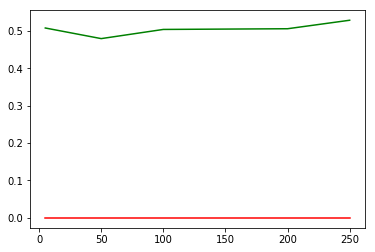

Working on... NVDA


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.540650406504065
------------
0.5144927536231884
------------
0.5228215767634855
------------
0.5245901639344263
------------
0.5185185185185185
------------
0.5129310344827587
------------
0.5386178861788617
------------
0.5163043478260869
------------
0.5414937759336099
------------
0.5368852459016393
------------
0.5061728395061729
------------
0.5107758620689655
------------
0.532520325203252
------------
0.519927536231884
------------
0.5269709543568465
------------
0.5307377049180327
------------
0.5102880658436214
------------
0.5150862068965517
------------
0.5386178861788617
------------
0.49818840579710144
------------
0.529045643153527
------------
0.5102459016393442
------------
0.49588477366255146
------------
0.5107758620689655
------------
0.5508130081300813
------------
0.5398550724637681
------------
0.49377593360995853
------------
0.5102459016393442
------------
0.5288065843621399
------------
0.5193965517241379
------------
0.4695121951219512
------------
0.5181159

0.5123456790123457
------------
0.5086206896551724
------------
0.5426829268292683
------------
0.5253623188405797
------------
0.491701244813278
------------
0.5327868852459017
------------
0.49176954732510286
------------
0.5344827586206896
------------
0.5264227642276422
------------
0.5235507246376812
------------
0.4979253112033195
------------
0.5286885245901639
------------
0.5061728395061729
------------
0.5064655172413793
------------
0.4878048780487805
------------
0.4746376811594203
------------
0.495850622406639
------------
0.5061475409836066
------------
0.5205761316872428
------------
0.4849137931034483
------------
0.49390243902439024
------------
0.5217391304347826
------------
0.5020746887966805
------------
0.5
------------
0.5041152263374485
------------
0.5086206896551724
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
------------
0.5
---------

KeyboardInterrupt: 

In [4]:

o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[5,50,100,200,250]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    prediction=rbf_svm.predict(x_val)
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                        
                    print(rbf_svm.score(x_val,y_val))
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    print('------------')
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        
        rbf_svm=svm.SVC(kernel='rbf',C=maxc,gamma=maxg)
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [ ]:
Now trying with permindex take both in account question1
============================================================
============================================================
Working on window: 2
Model Selection...
ACCURACY on val: 0.5530661949443676
Gamma: 100.0
C: 100.0
Accuracy on TEST set: 0.486328125
============================================================
============================================================
Working on window: 6
Model Selection...
ACCURACY on val: 0.5783333333333334
Gamma: 100.0
C: 100.0
Accuracy on TEST set: 0.5134099616858238
============================================================
============================================================
Working on window: 12
Model Selection...
ACCURACY on val: 0.6155064935064936
Gamma: 100.0
C: 100.0
Accuracy on TEST set: 0.4749034749034749
============================================================
============================================================
Working on window: 30
Model Selection...
ACCURACY on val: 0.6201424382069544
Gamma: 100.0
C: 1.0
Accuracy on TEST set: 0.4864864864864865
============================================================
============================================================
Working on window: 60
Model Selection...
ACCURACY on val: 0.5865671641791045
Gamma: 100.0
C: 1.0
Accuracy on TEST set: 0.5456349206349206
============================================================
============================================================
Working on window: 100
Model Selection...
ACCURACY on val: 0.6607817869415807
Gamma: 100.0
C: 100.0
Accuracy on TEST set: 0.5246913580246914
============================================================
============================================================
Working on window: 200
Model Selection...
ACCURACY on val: 0.6712328767123287
Gamma: 1.0
C: 10000.0
Accuracy on TEST set: 0.526595744680851
============================================================
============================================================
Working on window: 500
Model Selection...
ACCURACY on val: 0.8499999999999999
Gamma: 0.01
C: 10000.0
Accuracy on TEST set: 0.3474576271186441
